In [1]:
%load_ext lab_black

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats.stats import pearsonr
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (
    LinearRegression,
    LassoCV,
)
from sklearn.metrics import mean_squared_error

In [3]:
np.random.seed(1232)

In [4]:
N_OBS = 100

In [5]:
x_1 = np.random.uniform(0, 10, N_OBS)
e = np.random.normal(0, 1, N_OBS)
y = 3 + 2 * x_1 + e
g = np.random.normal(0, 0.5, N_OBS)
x_2 = -x_1 + g
r, _ = pearsonr(x_1, x_2)

In [6]:
x_1_new_scale = (1 / 100) * x_1

In [7]:
X_1 = x_1.reshape(-1, 1)
X_1_new_scale = x_1_new_scale.reshape(-1, 1)
X_2 = x_2.reshape(-1, 1)
X = np.concatenate((X_1, X_2), axis=1)
X_new_scale = np.concatenate((X_1_new_scale, X_2), axis=1)

In [8]:
ols_1 = LinearRegression().fit(X_1, y)
ols_1_new_scale = LinearRegression().fit(X_1_new_scale, y)
ols_2 = LinearRegression().fit(X_2, y)
ols = LinearRegression().fit(X, y)
ols_new_scale = LinearRegression().fit(X_new_scale, y)
lasso = LassoCV().fit(X, y)
lasso_new_scale = LassoCV().fit(X_new_scale, y)

In [9]:
y_hat_ols_1 = ols_1.predict(X_1)
y_hat_ols_1_new_scale = ols_1_new_scale.predict(X_1_new_scale)
y_hat_ols_2 = ols_2.predict(X_2)
y_hat_ols = ols.predict(X)
y_hat_ols_new_scale = ols_new_scale.predict(X_new_scale)
y_hat_lasso = lasso.predict(X)
y_hat_lasso_new_scale = lasso_new_scale.predict(X_new_scale)

In [10]:
mse_ols_1 = mean_squared_error(y, y_hat_ols_1)
mse_ols_1_new_scale = mean_squared_error(y, y_hat_ols_1_new_scale)
mse_ols_2 = mean_squared_error(y, y_hat_ols_2)
mse_ols = mean_squared_error(y, y_hat_ols)
mse_ols_new_scale = mean_squared_error(y, y_hat_ols_new_scale)
mse_lasso = mean_squared_error(y, y_hat_lasso)
mse_lasso_new_scale = mean_squared_error(y, y_hat_lasso_new_scale)

In [11]:
print(mse_ols_1)
print(mse_ols_1_new_scale)
print(mse_ols_2)
print(mse_ols)
print(mse_ols_new_scale)
print(mse_lasso)
print(mse_lasso_new_scale)

0.8832076713139565
0.8832076713139567
1.9349716560828156
0.8820340638669439
0.8820340638669439
0.8839162646122282
1.938546954576011


In [12]:
coef_ols_1 = ols_1.coef_
coef_ols_1_new_scale = ols_1_new_scale.coef_
coef_ols_2 = ols_2.coef_
coef_ols = ols.coef_
coef_ols_new_scale = ols_new_scale.coef_
coef_lasso = lasso.coef_
coef_lasso_new_scale = lasso_new_scale.coef_

In [13]:
print(coef_ols_1)
print(coef_ols_1_new_scale)
print(coef_ols_2)
print(coef_ols)
print(coef_ols_new_scale)
print(coef_lasso)
print(coef_lasso_new_scale)

[2.00772036]
[200.77203618]
[-1.91531443]
[2.07579664 0.06738546]
[2.07579664e+02 6.73854584e-02]
[ 1.99763788 -0.        ]
[ 0.         -1.89329297]


Text(0.2883189334680958, 21.208210524547354, 'MSE=0.88321')

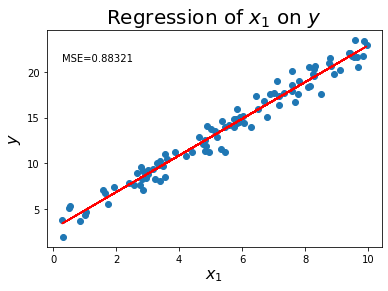

In [14]:
plt.scatter(x_1, y)
plt.plot(x_1, y_hat_ols_1, color="red")
plt.title("Regression of $x_1$ on $y$", fontsize=20)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16)
plt.text(min(x_1), 0.9 * max(y), f"MSE={mse_ols_1:.5f}")

Text(-10.47212299276417, 1.9302451458951566, 'MSE=1.93497')

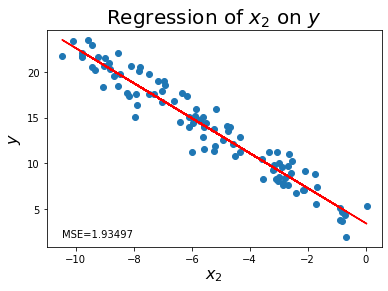

In [15]:
plt.scatter(x_2, y)
plt.plot(x_2, y_hat_ols_2, color="red")
plt.title("Regression of $x_2$ on $y$", fontsize=20)
plt.xlabel("$x_2$", fontsize=16)
plt.ylabel("$y$", fontsize=16)
plt.text(min(x_2), min(y), f"MSE={mse_ols_2:.5f}")

Text(0.2883189334680958, -10.47212299276417, 'correlation=-0.98232')

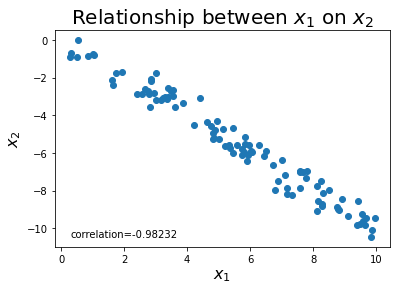

In [16]:
plt.scatter(x_1, x_2)
plt.title("Relationship between $x_1$ on $x_2$", fontsize=20)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
plt.text(min(x_1), min(x_2), f"correlation={r:.5f}")